In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 1. Load data, display column names and dataset size

In [172]:
df = pd.read_csv('heart.csv')
print(f'Dataset size: {df.shape}')
df.head()

Dataset size: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Work out gaps

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3. Visualize data

#### Heatmap

In [174]:
# Set the style for Seaborn plots
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")

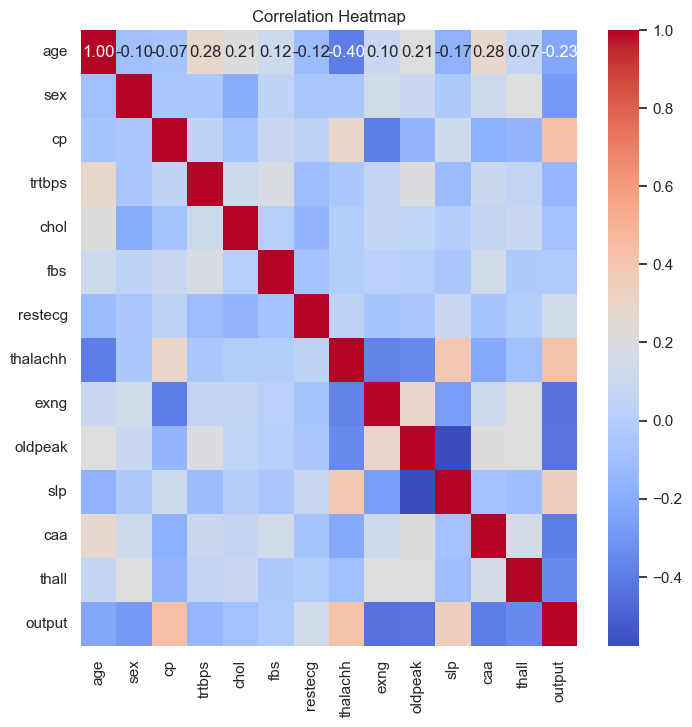

In [175]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Histograms of feature distribution

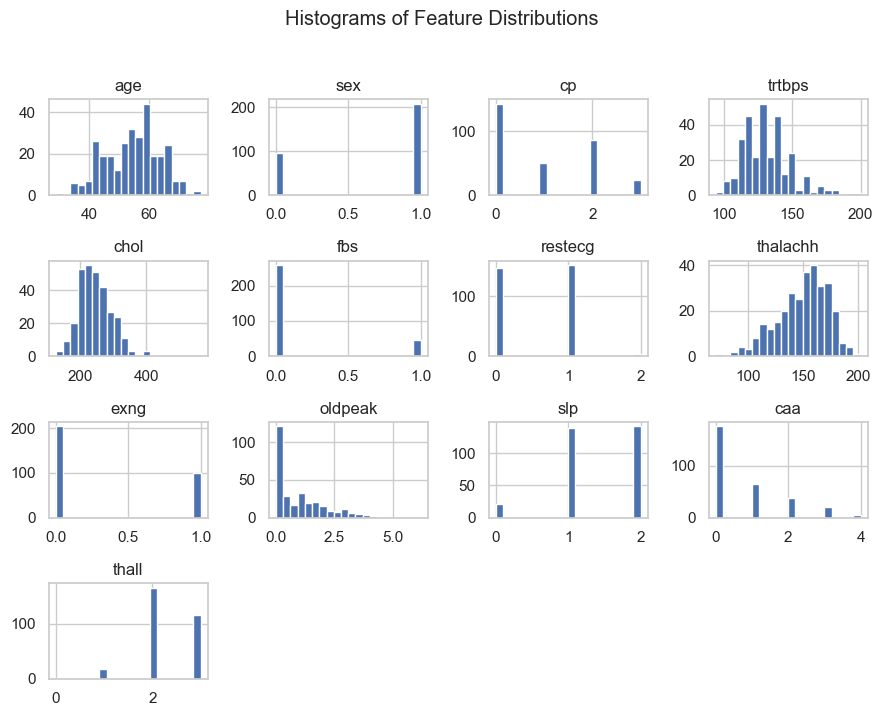

In [176]:
df.drop(columns=['output']).hist(figsize=(9, 7), bins=20)
plt.suptitle("Histograms of Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

#### Boxplots

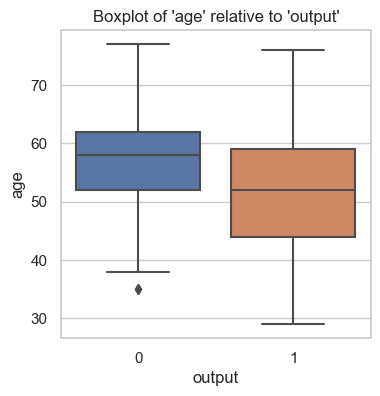

In [177]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="output", y="age", data=df)
plt.title("Boxplot of 'age' relative to 'output'")
plt.show()

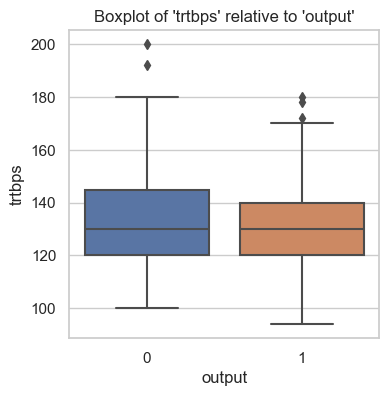

In [178]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="output", y="trtbps", data=df)
plt.title("Boxplot of 'trtbps' relative to 'output'")
plt.show()

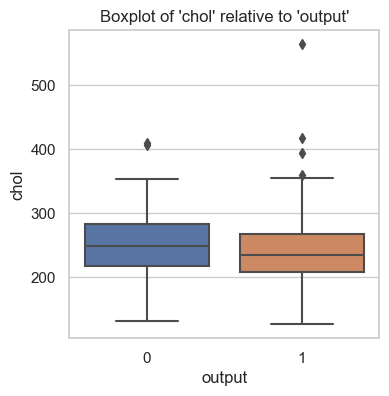

In [179]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="output", y="chol", data=df)
plt.title("Boxplot of 'chol' relative to 'output'")
plt.show()

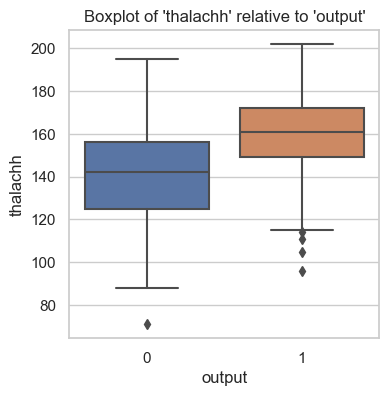

In [180]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="output", y="thalachh", data=df)
plt.title("Boxplot of 'thalachh' relative to 'output'")
plt.show()

### 4. Normalize the data

In [249]:
scaler = preprocessing.MinMaxScaler()
columns_names = df.columns
dt_transform = scaler.fit_transform(df)
scaled_dataset = pd.DataFrame(dt_transform, columns=columns_names)
scaled_dataset.head(100)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.500000,1.0,0.000000,0.452830,0.228311,0.0,0.0,0.305344,1.0,0.000000,1.0,0.00,1.000000,1.0
96,0.687500,0.0,0.000000,0.433962,0.611872,0.0,0.0,0.656489,0.0,0.193548,0.5,0.00,0.666667,1.0
97,0.479167,1.0,0.000000,0.132075,0.244292,1.0,0.5,0.580153,0.0,0.016129,1.0,0.75,1.000000,1.0
98,0.291667,1.0,0.666667,0.339623,0.431507,0.0,0.5,0.694656,0.0,0.306452,1.0,0.25,0.666667,1.0


### 5. Training classifiers

In [182]:
x = scaled_dataset.drop('output', axis=1);
y = scaled_dataset['output'];
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### KNN

In [190]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train.values, y_train.values)
pred = knn.predict(x_test.values)

print(f'Classification report: \n{classification_report(y_test, pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n')
print('Accuracy: ', accuracy_score(y_test, pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86        29
         1.0       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


Confusion Matrix: 
[[27  2]
 [ 7 25]]

Accuracy:  0.8524590163934426


In [184]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

print('The best number of neighbors:', error_rate.index(min(error_rate)) + 1)

The best number of neighbors: 18


#### Decision tree

In [218]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train.values, y_train.values)
pred = dtc.predict(x_test.values)

print(f'Classification report: \n{classification_report(y_test, pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n')
print('Accuracy: ', accuracy_score(y_test, pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        29
         1.0       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix: 
[[26  3]
 [ 7 25]]

Accuracy:  0.8360655737704918


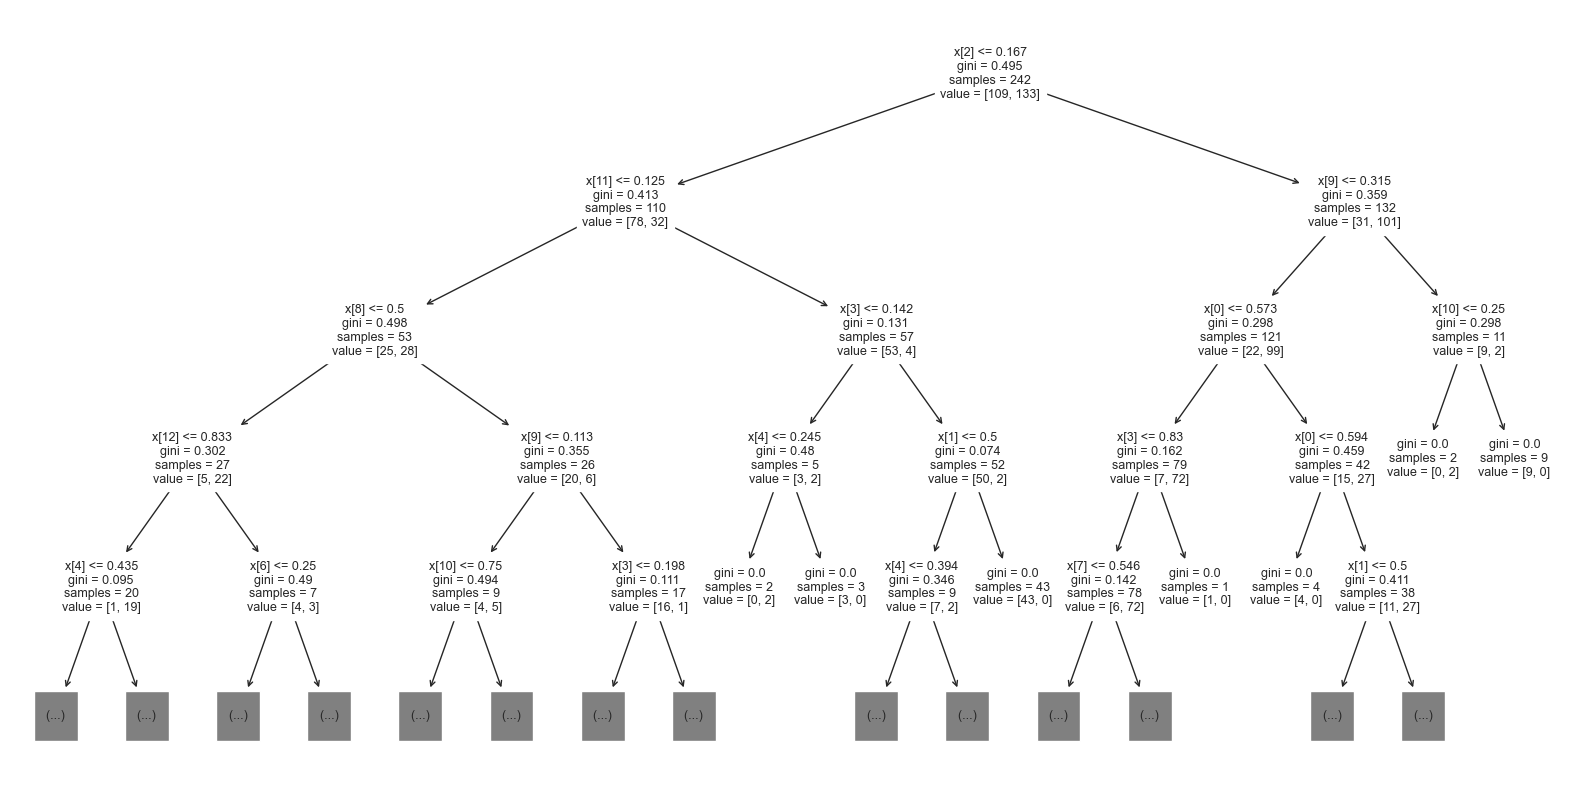

In [225]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=9)
plt.show()

#### SVM

In [235]:
svm = SVC(C=1000, gamma=0.01)
svm.fit(x_train.values, y_train.values)
pred = svm.predict(x_test.values)

print(f'Classification report: \n{classification_report(y_test, pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n')
print('Accuracy: ', accuracy_score(y_test, pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        29
         1.0       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix: 
[[25  4]
 [ 3 29]]

Accuracy:  0.8852459016393442


In [236]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV((SVC()), param_grid)
grid_search.fit(x_train, y_train)

print(f'Best Hyperparameters:{grid_search.best_params_}')

Best Hyperparameters:{'C': 1000, 'gamma': 0.01}


#### Random Forest

In [200]:
rfc = RandomForestClassifier()
rfc.fit(x_train.values, y_train.values)
pred = rfc.predict(x_test.values)

print(f'Classification report: \n{classification_report(y_test, pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n')
print('Accuracy: ', accuracy_score(y_test, pred))


Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        29
         1.0       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Confusion Matrix: 
[[24  5]
 [ 3 29]]

Accuracy:  0.8688524590163934


#### AdaBoost

In [212]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train.values, y_train.values)
pred = adaboost.predict(x_test.values)

print(f'Classification report: \n{classification_report(y_test, pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n')
print('Accuracy: ', accuracy_score(y_test, pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        29
         1.0       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


Confusion Matrix: 
[[25  4]
 [ 8 24]]

Accuracy:  0.8032786885245902
